In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Null Hypothesis: Lady is equally likely to guess the tea/milk correctly as incorrectly./
        Alternate Hypothesis: Lady is able to guess the tea/milk order more often than not.

Step 2: Test Statistic: how many cups are correctly guessed

Step 3: p-value: P(X>=3) = 0.24286 

In [52]:
M,n,N = 8,4,4
p_val = 1 - stats.hypergeom.cdf(2,M,n,N)
p_val

0.24285714285714288

Step 4: the null hypothesis is probably true. Anyone could get three correct 25% of the time, so there is not enough evidence to conclude anything solid.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [53]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Null Hypothesis: All species have equal average sepal widths./\ Alternate Hypothesis: Virginica Irises have longer mean sepal widths.

Step 2: Test Statistic: Observed difference in average sepal width.

Step 3: p_value: P(X>=0.204)

In [55]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

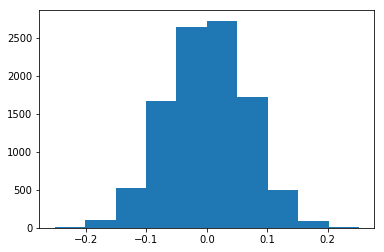

In [59]:
#shuffle and distribute to test null.
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000):
    iris_sample = iris_sub.with_column('sampled', iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts = np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])
plt.hist(ts)
plt.show()

Step 4: given variance is out of acceptable range, so null hypothesis is probably not true.